# Read data and transform data types

In [1]:
import pandas as pd
import json
import numpy as np
from itertools import chain
import matplotlib.pyplot as plt

In [2]:
movie_df = pd.read_csv('tmdb_5000_movies.csv')

In [3]:
credits_df = pd.read_csv("tmdb_5000_credits.csv")

In [4]:
combine = pd.merge(movie_df, credits_df, left_on = 'id', right_on = 'movie_id')

In [5]:
def process_df(df):
    df['release_date'] = pd.to_datetime(df['release_date'])
    json_cols = ['genres', 'keywords', 'production_countries', \
                 'production_companies', 'spoken_languages', 'cast', 'crew']
    for col in json_cols:
        df[col] = df[col].apply(json.loads)
    return df

In [6]:
combined_df = process_df(combine)

In [7]:
combined_df.dtypes

budget                           int64
genres                          object
homepage                        object
id                               int64
keywords                        object
original_language               object
original_title                  object
overview                        object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
status                          object
tagline                         object
title_x                         object
vote_average                   float64
vote_count                       int64
movie_id                         int64
title_y                         object
cast                            object
crew                            object
dtype: object

In [9]:
combined_df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...",...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."


In [12]:
combined_df['genres'][0]

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [13]:
def name_2_list(cols, key):
    """
    Converts columns that have values in the name column to a list and returns it.
    :param: cols is a column you wish to process
    :return: a list with the column values that have a key of "name"
    """
    lst = []
    for co in cols:
        lst.append(co[key])
    return lst

In [14]:
for col in ['genres', 'keywords', 'production_companies', 'production_countries']:
    combined_df[col] = combined_df[col].apply(name_2_list, key = 'name')

In [15]:
combined_df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."


## Explode the columns

In [16]:
l = combined_df.id.values.tolist()

In [17]:
l.count(4799)

0

In [18]:
max([len(x) for x in chain.from_iterable(combined_df.genres)])

15

In [19]:
df = combined_df

In [20]:
def explode_list(column_name):
    df = combined_df
    lens = [len(item) for item in df[column_name]]
    column_df = pd.DataFrame( {"movie_id" : np.repeat(df['id'].values, lens), 
                           column_name : np.concatenate(df[column_name].values)})
    return column_df

In [21]:
production_company = explode_list("production_companies")

In [22]:
def export_table(column_df,filename):
    column_df.to_csv(filename+".csv")

In [ ]:
export_table(production_company)

In [26]:
genres_df = explode_list("genres")

In [27]:
genres_df.head()

,movie_id,genres
0,19995,Action
1,19995,Adventure
2,19995,Fantasy
3,19995,Science Fiction
4,285,Adventure


In [ ]:
genres_df.to_csv("genres.csv")

In [ ]:
for col in ['keywords', 'production_countries', 'spoken_languages']:
    export_table(explode_list(col),col)

# Extract Cast and Crews

In [29]:
combined_df['cast'][0][:3]

[{'cast_id': 242,
  'character': 'Jake Sully',
  'credit_id': '5602a8a7c3a3685532001c9a',
  'gender': 2,
  'id': 65731,
  'name': 'Sam Worthington',
  'order': 0},
 {'cast_id': 3,
  'character': 'Neytiri',
  'credit_id': '52fe48009251416c750ac9cb',
  'gender': 1,
  'id': 8691,
  'name': 'Zoe Saldana',
  'order': 1},
 {'cast_id': 25,
  'character': 'Dr. Grace Augustine',
  'credit_id': '52fe48009251416c750aca39',
  'gender': 1,
  'id': 10205,
  'name': 'Sigourney Weaver',
  'order': 2}]

In [30]:
cast_table = explode_list('cast')

In [31]:
cast_formatted = cast_table.join(pd.DataFrame(cast_table.pop('cast').tolist()))

In [37]:
cast_formatted.head(2)

,movie_id,cast_id,character,credit_id,gender,id,name,order
0,19995,242,Jake Sully,5602a8a7c3a3685532001c9a,2,65731,Sam Worthington,0
1,19995,3,Neytiri,52fe48009251416c750ac9cb,1,8691,Zoe Saldana,1


In [ ]:
export_table(cast_formatted,"cast")

In [32]:
crew_table = explode_list('crew')

In [33]:
crew_formatted = crew_table.join(pd.DataFrame(crew_table.pop('crew').tolist()))

In [38]:
crew_formatted.head(2)

,movie_id,credit_id,department,gender,id,job,name
0,19995,52fe48009251416c750aca23,Editing,0,1721,Editor,Stephen E. Rivkin
1,19995,539c47ecc3a36810e3001f87,Art,2,496,Production Design,Rick Carter


In [ ]:
export_table(crew_formatted,'crew')

In [34]:
language_table = explode_list('spoken_languages')

In [35]:
language_formatted = language_table.join(pd.DataFrame(language_table.pop('spoken_languages').tolist()))

In [36]:
language_formatted.head(2)

,movie_id,iso_639_1,name
0,19995,en,English
1,19995,es,Español


In [ ]:
export_table(language_formatted,'spoken_languages')

## Handling Missing Values

In [39]:
combined_df.isnull().sum(axis=0).reset_index()

,index,0
0,budget,0
1,genres,0
2,homepage,3091
3,id,0
4,keywords,0
5,original_language,0
6,original_title,0
7,overview,3
8,popularity,0
9,production_companies,0


In [40]:
cleaned_df = combined_df

In [ ]:
for col in ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages', 'cast', 'crew']:
    del cleaned_df[col]

In [ ]:
#combined_df.dropna(inplace=True)

In [ ]:
cleaned_df.to_csv("cleaned.csv", index = None)

# Get cast networks

In [41]:
movie_df = pd.read_csv('tmdb_5000_movies.csv')
credits_df = pd.read_csv("tmdb_5000_credits.csv")
combine = pd.merge(movie_df, credits_df, left_on = 'id', right_on = 'movie_id')

In [42]:
def process_df(df):
    df['release_date'] = pd.to_datetime(df['release_date'])
    json_cols = ['genres', 'keywords', 'production_countries', \
                 'production_companies', 'spoken_languages', 'cast', 'crew']
    for col in json_cols:
        df[col] = df[col].apply(json.loads)
    return df

In [43]:
combined_df = process_df(combine)

In [44]:
def get_actor(x, actor_num):
    for item in x:
        if item["order"] == actor_num: 
            return item["name"]

In [45]:
combined_df['cast'][:2].apply(get_actor, actor_num=0)

0    Sam Worthington
1        Johnny Depp
Name: cast, dtype: object

In [46]:
combined_df['actor1'] = combined_df['cast'].apply(get_actor, actor_num=0)
combined_df['actor2'] = combined_df['cast'].apply(get_actor, actor_num=1)
combined_df['actor3'] = combined_df['cast'].apply(get_actor, actor_num=2)

In [47]:
combined_df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,title_x,vote_average,vote_count,movie_id,title_y,cast,crew,actor1,actor2,actor3
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...",...,Avatar,7.2,11800,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...",Sam Worthington,Zoe Saldana,Sigourney Weaver
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",Johnny Depp,Orlando Bloom,Keira Knightley


## Get crew information

In [48]:
def get_director(crew_data):
    directors = [x['name'] for x in crew_data if x['job'] == 'Director']
    return safe_access(directors, [0])

In [49]:
def get_director(x):
    for item in x:
        if item["job"] == 'Director': 
            return item["name"]

In [50]:
combined_df['crew'][:2].apply(get_director)

0     James Cameron
1    Gore Verbinski
Name: crew, dtype: object

In [51]:
def get_writer(x):
    for item in x:
        if item['department'] == 'Writing':
            return item["name"]

In [52]:
combined_df['crew'][:2].apply(get_writer)

0    James Cameron
1      Ted Elliott
Name: crew, dtype: object

In [53]:
def get_producer(x):
    for item in x:
        if item['department'] == 'Production':
            return item["name"]

In [54]:
combined_df['director'] = combined_df['crew'].apply(get_director)

In [55]:
combined_df['ScreenPlay'] = combined_df['crew'].apply(get_writer)

In [56]:
combined_df['producer'] = combined_df['crew'].apply(get_producer)

In [57]:
combined_df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,movie_id,title_y,cast,crew,actor1,actor2,actor3,director,ScreenPlay,producer
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...",...,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...",Sam Worthington,Zoe Saldana,Sigourney Weaver,James Cameron,James Cameron,Mali Finn
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",Johnny Depp,Orlando Bloom,Keira Knightley,Gore Verbinski,Ted Elliott,Jerry Bruckheimer


In [58]:
combined_drop_ZeroCount = combined_df[combined_df['vote_count'] != 0]

In [59]:
combined_drop_ZeroCount['vote_count'].describe()

count     4741.000000
mean       699.244252
std       1240.091227
min          1.000000
25%         58.000000
50%        242.000000
75%        750.000000
max      13752.000000
Name: vote_count, dtype: float64

In [60]:
voted_movies = combined_drop_ZeroCount[combined_drop_ZeroCount['vote_count'] >= 242]

In [61]:
voted_movies['vote_average'].describe()

count    2374.000000
mean        6.456361
std         0.797547
min         2.900000
25%         5.900000
50%         6.500000
75%         7.000000
max         8.500000
Name: vote_average, dtype: float64

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


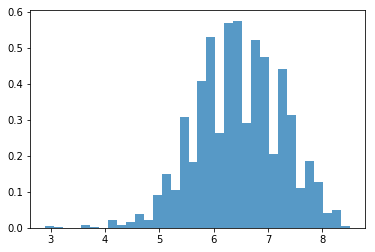

In [62]:
plt.hist(voted_movies['vote_average'], 'auto', normed = 100, alpha=0.75)
plt.show()

In [63]:
high_score = voted_movies[(voted_movies['vote_average'] >= 7.0)]
low_score = voted_movies[(voted_movies['vote_average'] <= 5.9)]

In [64]:
# Sort the dataset by score:
high_score = high_score.sort_values(by = "vote_average", ascending = False)

In [66]:
high_score.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,movie_id,title_y,cast,crew,actor1,actor2,actor3,director,ScreenPlay,producer
1881,25000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,278,"[{'id': 378, 'name': 'prison'}, {'id': 417, 'n...",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,"[{'name': 'Castle Rock Entertainment', 'id': 97}]",...,278,The Shawshank Redemption,"[{'cast_id': 3, 'character': 'Andy Dufresne', ...","[{'credit_id': '52fe4231c3a36847f800b153', 'de...",Tim Robbins,Morgan Freeman,Bob Gunton,Frank Darabont,Stephen King,Deborah Aquila
3337,6000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",http://www.thegodfather.com/,238,"[{'id': 131, 'name': 'italy'}, {'id': 699, 'na...",en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,238,The Godfather,"[{'cast_id': 5, 'character': 'Don Vito Corleon...","[{'credit_id': '52fe422bc3a36847f80093c9', 'de...",Marlon Brando,Al Pacino,James Caan,Francis Ford Coppola,Francis Ford Coppola,Gray Frederickson


In [67]:
high_score_cast = high_score[['title_x','actor1', 'actor2', 'actor3', 'vote_average']]

In [69]:
high_score_crew = high_score[['title_x','director', 'ScreenPlay', 'producer', 'vote_average']]

In [68]:
high_score_cast.head(2)

,title_x,actor1,actor2,actor3,vote_average
1881,The Shawshank Redemption,Tim Robbins,Morgan Freeman,Bob Gunton,8.5
3337,The Godfather,Marlon Brando,Al Pacino,James Caan,8.4


In [70]:
high_score_crew.head(2)

,title_x,director,ScreenPlay,producer,vote_average
1881,The Shawshank Redemption,Frank Darabont,Stephen King,Deborah Aquila,8.5
3337,The Godfather,Francis Ford Coppola,Francis Ford Coppola,Gray Frederickson,8.4


In [71]:
# Sort the dataset by score:
low_score = low_score.sort_values(by = "vote_average", ascending = True)

In [72]:
low_score.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,movie_id,title_y,cast,crew,actor1,actor2,actor3,director,ScreenPlay,producer
1652,100000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,14164,"[{'id': 3436, 'name': 'karate'}, {'id': 9715, ...",en,Dragonball Evolution,The young warrior Son Goku sets out on a quest...,21.677732,"[{'name': 'Ingenious Film Partners', 'id': 289...",...,14164,Dragonball Evolution,"[{'cast_id': 17, 'character': 'Master Roshi', ...","[{'credit_id': '52fe45d29251416c75063b05', 'de...",Chow Yun-fat,Justin Chatwin,Joon Park,James Wong,Ben Ramsey,Stephen Chow
480,44000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",NaN,5491,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,Battlefield Earth,"In the year 3000, man is no match for the Psyc...",7.891470,"[{'name': 'Franchise Pictures', 'id': 1403}, {...",...,5491,Battlefield Earth,"[{'cast_id': 11, 'character': 'Terl', 'credit_...","[{'credit_id': '52fe4409c3a36847f807e759', 'de...",John Travolta,Barry Pepper,Forest Whitaker,Roger Christian,Corey Mandell,Lynn Stalmaster


In [74]:
low_score_cast = low_score[['title_x','actor1', 'actor2', 'actor3', 'vote_average']]

In [75]:
low_score_cast.head(2)

,title_x,actor1,actor2,actor3,vote_average
1652,Dragonball Evolution,Chow Yun-fat,Justin Chatwin,Joon Park,2.9
480,Battlefield Earth,John Travolta,Barry Pepper,Forest Whitaker,3.0


In [76]:
low_score_crew = low_score[['title_x','director', 'ScreenPlay', 'producer', 'vote_average']]

In [77]:
low_score_crew.head(2)

,title_x,director,ScreenPlay,producer,vote_average
1652,Dragonball Evolution,James Wong,Ben Ramsey,Stephen Chow,2.9
480,Battlefield Earth,Roger Christian,Corey Mandell,Lynn Stalmaster,3.0


In [78]:
def gephi(df):
    df = df.drop(['title_x', 'vote_average'], axis = 1) # drop extra columns
    df = df.replace(' ', '_', regex=True) # replace whitespace by underscore, since Gephi doesn't recognize spaces
    df = df.reset_index(drop=True) # reset indices
    return(df)

In [79]:
high_score_cast_df = gephi(high_score_cast)
high_score_cast_df.head(2)

,actor1,actor2,actor3
0,Tim_Robbins,Morgan_Freeman,Bob_Gunton
1,Marlon_Brando,Al_Pacino,James_Caan


In [80]:
high_score_crew_df = gephi(high_score_crew)

In [81]:
low_score_cast_df = gephi(low_score_cast)

In [82]:
low_score_crew_df = gephi(low_score_crew)

In [83]:
low_score_cast_df.describe()

,actor1,actor2,actor3
count,624,629,628
unique,343,505,536
top,Arnold_Schwarzenegger,Jennifer_Aniston,Matthew_Lillard
freq,13,5,4


In [ ]:
high_score_cast_df.to_csv("high_score_cast.csv", sep = ";", index = False, header = False)
high_score_crew_df.to_csv("high_score_crew.csv", sep = ";", index = False, header = False)
low_score_cast_df.to_csv("low_score_cast.csv", sep = ";", index = False, header = False)
low_score_crew_df.to_csv("low_score_crew.csv", sep = ";", index = False, header = False)

In [ ]:
highScore_castCrew = high_score[['title_x','director', 'ScreenPlay', 'producer', 'actor1','actor2','actor3','vote_average']]

In [ ]:
lowScore_castCrew = low_score[['title_x','director', 'ScreenPlay', 'producer', 'actor1','actor2','actor3','vote_average']]

In [ ]:
gephi(highScore_castCrew).to_csv("high_score_castCrew.csv", sep = ";", index = False, header = False)
gephi(lowScore_castCrew).to_csv("low_score_castCrew.csv", sep = ";", index = False, header = False)